

# Project: Investigate a Dataset (tmdb_movie dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The "tmdb_movie.csv" dataset is chosen in this analysis. The dataset has 21 variables and 10866 observations in total. The 21 variables contain movie information like the unique ID number, director, genres, cast, budget, revenue, revenue, popularity and how people vote for each movie.

The whole dataset looks very clean except the variable "genres", which has several values in each cell. The "genres" will be manipulated and explored in terms of profit, popularity and budget in the exploration part. There are 3 questions will be asked and analyzed: 1. What's the distribution look like for profit, popularity, budget and genres? (Because the Q3 is inspired from the answer of Q2, so we only consider "Yes" situation.)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
#how many cols and rows
df.shape

(10866, 21)

The dataset contains 10866 rows and 21 columns.

In [4]:
#quantiles of numeric variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The table gives us summary statistics of numeric variable in te dataset. The average popularity is 0.646, and 75% of films have popularity under 0.714. The mean runtime is 102 mins, and at least 75% films have runtime less than 111. The mean of vote_count is 217, but the median is only 38. That means there are some movies having extreme high vote_count. The mean of vote_average is 5.97, which is very close to its median 6. The means of budget_adj and revenue_adi are 17,551,040 and 51,364,360. It looks like that films are profitable on the whole. 

In [5]:
#check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There are many missing values in "homepage", "tagline", "keywords" and "production_companies", and several missing values in "cast", "director", "overview" and "genres".  

I also notice that columns of "budget_adj" and "revenue_adj" are repetitions of "budget" and "revenue". I will choose adjusted ones beacuase we may compare films acorss lots of year. It would be more fair to use inflation-adjusted data.  

### Data Cleaning

#### Step 1 Check duplicates

In [6]:
#check if there are duplicates on the wohle
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


In [7]:
#Look at the duplicate
df[df.id == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


The two rows are totally same, so we will delete one of them.

In [8]:
#delete duplicate
df.drop_duplicates(inplace = True)

#check the shape of dataset
df.shape

(10865, 21)

The duplicate row is deleted. At the same time, I also want to check if there are duplicates in columns "original_title", 'director' and "tagline", because movies are rarely have same title, cast and tagline. I want to ensure these data are alright.

In [9]:
#check duplicates in "original_title" and "tagline"

df[df.duplicated(subset = ['original_title', 'director', 'tagline'])]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6701,16781,tt0455612,0.552267,6000000,57231524,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,Based upon Tyler Perry's acclaimed stage produ...,110,Drama|Comedy|Romance,Lions Gate Films,2/24/2006,63,6.0,2006,6490014.95,61905574.39


In [10]:
#Let's look at the duplicate
df[df.original_title == "Madea's Family Reunion"][df.director == "Tyler Perry"]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4063,28004,tt0359639,0.371510,6000000,0,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,"Just as the southern matriarch, Madea buries h...",0,Comedy,NaN,1/25/2002,49,5.9,2002,7273568.362,0.00
6701,16781,tt0455612,0.552267,6000000,57231524,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,NaN,Tyler Perry,NaN,...,Based upon Tyler Perry's acclaimed stage produ...,110,Drama|Comedy|Romance,Lions Gate Films,2/24/2006,63,6.0,2006,6490014.950,61905574.39


It shows that, the movie "Madea's Family Reunion" has two versions in years of 2002 and 2006. When I searched online, the cast of 2002 is different from 2006, but here the table shows totally same cast. Other columns look fine. I plan to keep both rows because I will drop column "cast" when I choose variables to analyse. 

#### Step 2 Split "genres" and create new data frame "genres_df"

In [11]:
#split "genres" and put the split geners into new built columns
df['genres_1'], df['genres_2'], df['genres_3'], df['genres_4'], df['genres_5'] = df['genres'].str.split('|').str

Now in the "df", we have 5 genres in each row. I want to creat a new data frame "genres_df" that only contains movie Id and genres, where genres are seperated in several rows for each movie ID. I will chooes "id" as ID here.

In [12]:
#choose cols for new data frame
genres_df = df[['id','genres_1', 'genres_2', 'genres_3','genres_4', 'genres_5']]

In [13]:
#set imdb_id as index to reshape (stack) data frame in the next
genres_df.set_index('id', inplace = True)

In [14]:
#to make 'genres_1', 'genres_2', 'genres_3','genres_4', 'genres_5' from column to be rows
genres_df = genres_df.stack()

In [15]:
#make "imdb_id" back to variable
genres_df = genres_df.reset_index()

In [16]:
#look at genres_df
genres_df.head()

,id,level_1,0
0,135397,genres_1,Action
1,135397,genres_2,Adventure
2,135397,genres_3,Science Fiction
3,135397,genres_4,Thriller
4,76341,genres_1,Action


In [17]:
#drop col and rename cols
genres_df.drop('level_1', axis = 1, inplace = True)
genres_df.rename(columns={'id': 'id', 0: 'genres_new'}, inplace=True)

In [18]:
#drop duplicates in genres_df
genres_df.drop_duplicates(inplace = True)

In [19]:
#the final look of genres_df
genres_df.head()

,id,genres_new
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


#### Step 3 Create new variable "profit_adj" in df

In [20]:
df["profit_adj"] = df["revenue_adj"] - df["budget_adj"]

#### Step 4  Select variables from df 

In [21]:
#the variables kept to analyse are: "imdb_id", "popularity", "budget_adj" and "profit_adj"
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'overview', 'cast', 'keywords', 'runtime', 'production_companies', \
        'release_date', 'original_title', 'director', 'tagline', 'genres', 'vote_count', 'vote_average', \
        'release_year', 'revenue_adj', 'genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5'], axis = 1, inplace = True)

#### Step 5 Check with missing values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 4 columns):
id            10865 non-null int64
popularity    10865 non-null float64
budget_adj    10865 non-null float64
profit_adj    10865 non-null float64
dtypes: float64(3), int64(1)
memory usage: 744.4 KB


After selecting variables, data frame looks have no missing values. So we move on to the next step.

#### step 6 Merge "df" and "genres_df"

In [23]:
merge_df = pd.merge(df,genres_df, on = 'id')

In [24]:
merge_df.drop_duplicates(inplace = True)

In [25]:
merge_df.shape

(26955, 5)

In [26]:
genres_df.shape

(26955, 2)

In [27]:
merge_df.head()

,id,popularity,budget_adj,profit_adj,genres_new
0,135397,32.985763,137999939.3,1.254446e+09,Action
1,135397,32.985763,137999939.3,1.254446e+09,Adventure
2,135397,32.985763,137999939.3,1.254446e+09,Science Fiction
3,135397,32.985763,137999939.3,1.254446e+09,Thriller
4,76341,28.419936,137999939.3,2.101614e+08,Action


The "merge_df" have same rows as "genres_df", which is exactly what we expect. In the next exploration part, we will use "df" when we wan to display distributions of popularity, profit and budget. We will use "merge_df" when we are going to investigate any exploration about "genres".

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What's the distribution look like for profit, popularity, budget and genres?

Text(0.5,1,'distribution of profit')

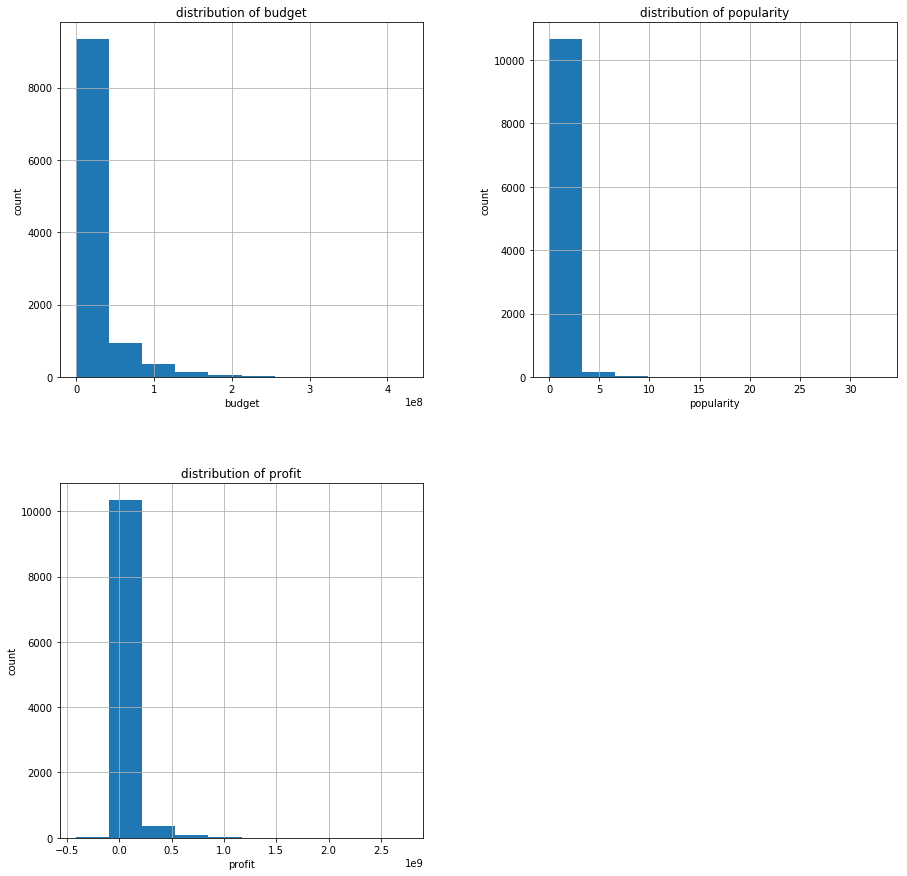

In [28]:
#dist of budget, popularity and profit
ax = df[['popularity', 'profit_adj', 'budget_adj']].hist(figsize = (15,15), sharey = False)
ax[0,0].set_ylabel('count')
ax[0,0].set_xlabel('budget')
ax[0,0].set_title('distribution of budget')
ax[0,1].set_ylabel('count')
ax[0,1].set_xlabel('popularity')
ax[0,1].set_title('distribution of popularity')
ax[1,0].set_ylabel('count')
ax[1,0].set_xlabel('profit')
ax[1,0].set_title('distribution of profit')

The distributions of budget, popularity and profit are all right skewed. Most movies are having budgets of less than 50,000,000, popularity of less than 5 and profits less than 500,000,000.

Text(0.5,1,'Bar chart of counts in each genre')

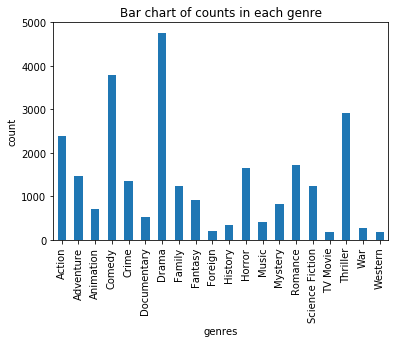

In [29]:
#dist of genres_new
ax = genres_df.groupby('genres_new').count().plot.bar(legend = False)
ax.set_xlabel("genres")
ax.set_ylabel("count")
ax.set_title("Bar chart of counts in each genre")

"Drama" genre has the highest counts of movies, followed by "Comedy" and "Thriller".  I wonder what kind of genre has the highest profit and what genre is most popular. Are they same genre? Let's look it into next question.

### Research Question 2 : Is the highest profitable movie genre also most popular? 

#### The most popular genre

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Boxplot of popularity in each genre')

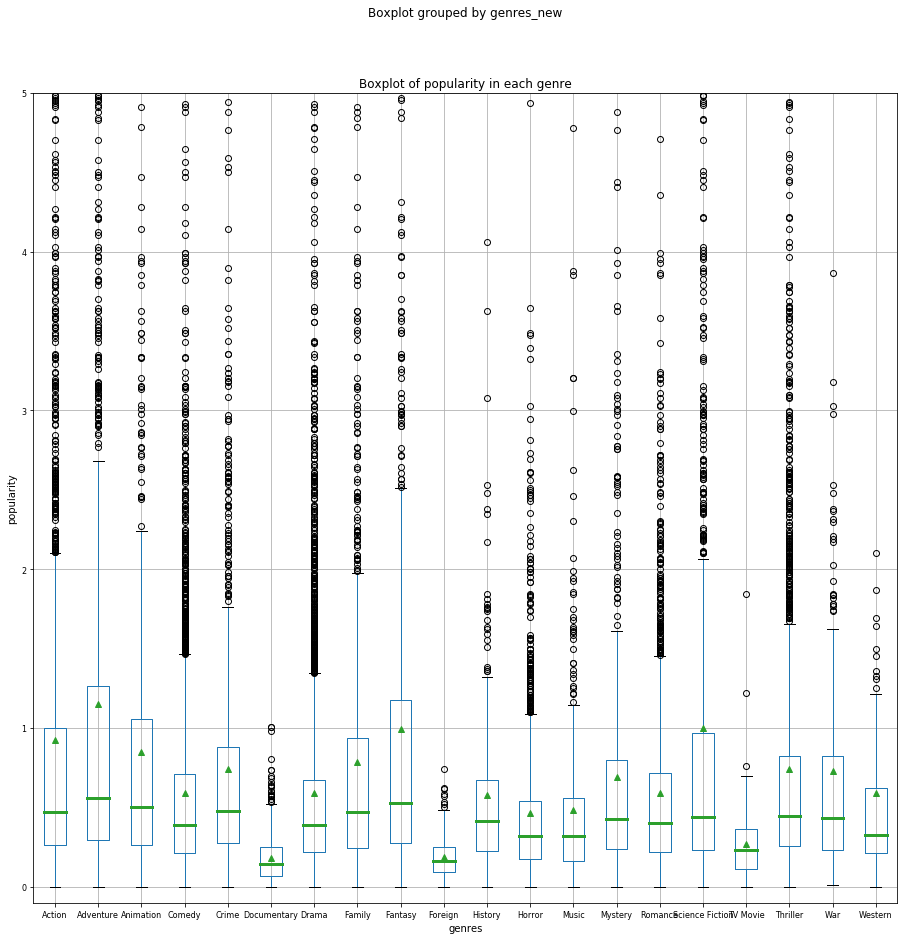

In [30]:
medianprops = dict(linestyle='-', linewidth=3, color='blue')
ax = merge_df.boxplot(column = 'popularity', by = 'genres_new', showmeans=True, figsize=(15, 15), fontsize=8, medianprops=medianprops)
plt.ylim(-0.1,5)
ax.set_xlabel("genres")
ax.set_ylabel("popularity")
ax.set_title("Boxplot of popularity in each genre")

It look that Adventure are most popular on the wohle, especially the Top 50% in Adventure movies. At the same time, no matter in terms of meidan or mean, Adventure is the best over other genres. So I conclude "Adventure" is the most popular genres movie.

#### The most profitable genre

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Boxplot of profit in each genre')

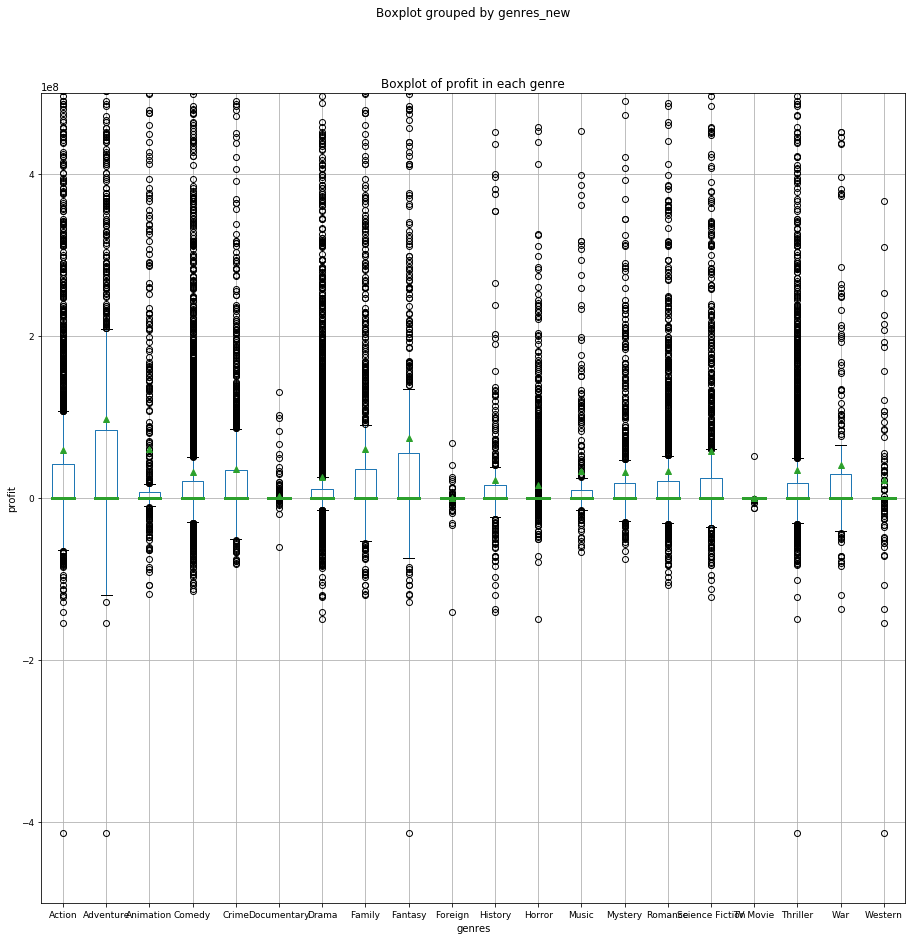

In [31]:
medianprops = dict(linestyle='-', linewidth=3, color='blue')
ax = merge_df.boxplot(column = 'profit_adj', by = 'genres_new', showmeans=True, figsize=(15, 15), fontsize=9,\
                      medianprops=medianprops)
ax.set_ylim(-0.5e+09,0.5e+09)
ax.set_xlabel("genres")
ax.set_ylabel("profit")
ax.set_title("Boxplot of profit in each genre")

All 50% genres movies have profits below 0, and it seems Adventure is the worst. In terms of another 50%, Adventure looks have best performace, especially the Top 25% Adventure movies having highest profits among other genres. If we look at mean, Adventure could give us the highest average profits as well. So I decide choose "Adventure" as the highest profit genres.

#### The statistic table

In [32]:
merge_df.groupby(['genres_new']).agg({'profit_adj': ['mean', 'median'],      
                                     'popularity': ['mean', 'median']}) 

profit_adj        popularity          
                         mean median       mean    median
genres_new                                               
Action           5.879816e+07    0.0   0.926274  0.469825
Adventure        9.773789e+07    0.0   1.154259  0.561034
Animation        5.996078e+07    0.0   0.852182  0.501163
Comedy           3.197669e+07    0.0   0.592607  0.388667
Crime            3.510290e+07    0.0   0.744930  0.476338
Documentary      1.634988e+06    0.0   0.181432  0.142240
Drama            2.556360e+07    0.0   0.591495  0.389212
Family           6.081282e+07    0.0   0.786668  0.470249
Fantasy          7.380484e+07    0.0   0.992840  0.530123
Foreign         -5.948650e+05    0.0   0.191496  0.165482
History          2.139056e+07    0.0   0.575936  0.412770
Horror           1.631787e+07    0.0   0.465357  0.321891
Music            3.366706e+07    0.0   0.487321  0.321762
Mystery          3.140699e+07    0.0   0.690012  0.428021
Romance          3.254100e+07    0.0   0.592082  0.403937
Science Fiction  5.745413e+07    0.0   1.001548  0.439600
TV Movie         5.361383e+04    0.0   0.270896  0.230561
Thriller         3.460314e+07    0.0   0.741563  0.444337
War              4.105605e+07    0.0   0.727683  0.432470
Western          2.160382e+07    0.0   0.590615  0.328263

COmpare statistics form the table, we can confirm that Adventure is the most profitable and most popular movie genre. 

### Research Question 3 :  In Adventure genre, do the movies with higher budgets tend to have higher profits and popularity? 

Text(0,0.5,'popularity')

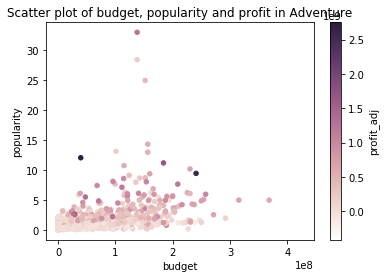

In [33]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax = merge_df[merge_df.genres_new == 'Adventure'].plot(kind = 'scatter', x='budget_adj', y='popularity', c = 'profit_adj',\
                                            cmap=cmap, legend = True, sharex=False)

plt.title("Scatter plot of budget, popularity and profit in Adventure")
ax.set_xlabel("budget")
ax.set_ylabel("popularity")

It shows that there is some relation between budget and profit, since more profitable movies are tend to be in the higher budget bands. Likewise, it looks some relation between budget and popularity because popularity increases as budget grows up. Let's investigate the correlation between them in the next.

In [34]:
#correlation between profit and budget in Adventure
merge_df[merge_df.genres_new == 'Adventure']['profit_adj'].corr(merge_df[merge_df.genres_new == 'Adventure']['budget_adj'])

0.47047156790031264

In [35]:
#correlation between popularity and budget in Adventure
merge_df[merge_df.genres_new == 'Adventure']['popularity'].corr(merge_df[merge_df.genres_new == 'Adventure']['budget_adj'])

0.49610755740022827

correlation coefficients of near 0.5 are strong relationship. So we conclude that higher budget Adventure movies are tend to have higher popularity and profits.

<a id='conclusions'></a>
## Conclusions

The analysis is mainly focus on variables of "genres", "budget_adj", "profit_adj" and "popularity". We found that budget, profit and popularity are skewed to right. An interesting finding is although the most frequent movie genre in this data set is Drama, the most popular and profitable movie genre is Adventure. When we explore the relation of budget with profit and popularity in Adventure genre, we conlude that higher budget movies are tend to higher profits and popularity. We cannot conclude any causation in this analysis, but I hope it could give hints to people who are in movie industry.

There are some limitations in this analysis. It only focus on 4 variables, and there are still a lot can be expxlored from the 4 variables, like relation between profit and popularity. In the future works, I hope all variables could be invetigated more deeply. 

### Reference

[Udacity's home page](https://www.udacity.com)

[stackoverflow's home page](https://stackoverflow.com/)

McKinney, W.(2012). Python for Data Analysis: O'reilly

<a id='conclusions'></a>
## Submitting your Project 

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0